In [0]:
Generator- to generate images
Discriminator- checks whether image generated is fake or real

In [0]:
! pip3 install tqdm

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm

In [0]:
from keras.layers import Input, Dense, Dropout, Flatten, LeakyReLU
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras.optimizers import Adam
from keras import backend as K

Using TensorFlow backend.


In [0]:
K.set_image_dim_ordering('th')
#th:(depth,input,rows,colunms)
#tf:(rows,columns,input,depth)

np.random.seed(1000)

randomDim=100 #10*10 image

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [0]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


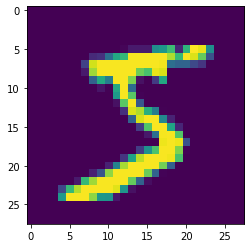

In [0]:
plt.imshow(x_train[0])
plt.show()

In [0]:
X_train= (x_train.astype(np.float32)-127.5)/127.5 #Converting into standard normal distribution range from -1 to 1(normalizing)

In [0]:
X_train=X_train.reshape(60000,784) #Image is flatten

In [0]:
adam=Adam(lr=0.0002 ,beta_1=0.5)

In [0]:
generator=Sequential()
generator.add(Dense(256, input_dim=randomDim)) #Passing random noise as input
generator.add(LeakyReLU(0.2)) 

generator.add(Dense(512))
generator.add(LeakyReLU(0.2))

generator.add(Dense(1024))
generator.add(LeakyReLU(0.2))

generator.add(Dense(784, activation='tanh'))
generator.compile(loss='binary_crossentropy',optimizer=adam)
generator.summary()

W0712 16:05:51.098943  7864 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizers.py:711: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0712 16:05:51.112733  7864 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2944: The name tf.log is deprecated. Please use tf.math.log instead.

W0712 16:05:51.148758  7864 deprecation.py:323] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              525312    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 784)               803600    
Total para

In [0]:
discriminator=Sequential()
discriminator.add(Dense(1024, input_dim=784))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))

discriminator.add(Dense(512))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
                  
discriminator.add(Dense(256))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Dropout(0.3))
            
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer=adam)
discriminator.summary()

W0712 16:10:27.341696  7864 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:3013: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              803840    
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 1024)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
__________

In [0]:
#Combining generator and descriminator
discriminator.trainable=False
ganInput=Input(shape=(randomDim,)) #Functional model- image is given as input
x=generator(ganInput)
ganOutput=discriminator(x)

gan=Model(input=ganInput, output=ganOutput)
gan.compile(loss='binary_crossentropy',optimizer=adam)
gan.summary()

C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               1486352   
_________________________________________________________________
sequential_4 (Sequential)    (None, 1)                 1460225   
Total params: 2,946,577
Trainable params: 1,486,352
Non-trainable params: 1,460,225
_________________________________________________________________


In [0]:
def generateAndPlot():
    num_examples=100
    noise=np.random.normal(0,1,size=[num_examples,randomDim])
    generatedImages=generator.predict(noise)
    generatedImages=generatedImages.reshape(num_examples,28,28)
    plt.figure(figsize=(10,10))
    for i in range(num_examples):
        plt.subplot(10,10,i+1)
        plt.imshow(generatedImages[i],interpolation='nearest',cmap='gray_r')
        plt.axis('off')
    plt.show()

In [0]:
def train(epochs=1, batchSize=128):
    m=X_train.shape[0]
    batchCount=m//batchSize #  // divide by integer--typecasting
    generateAndPlot()
    for e in range(epochs):
        print(f"Epoch:{e}")
        for _ in tqdm(range(batchCount)):
            noise=np.random.normal(0,1,size=[batchSize, randomDim])
            generatedImages=generator.predict(noise)  #Fake images are generated
            
            imageBatch=X_train[np.random.randint(0,m,size=batchSize)]  #choose any 128 images from 60000 images(real images)
            X=np.concatenate([imageBatch, generatedImages])  # Concatenate fake and real images-total 256 images
            
            yDis = np.zeros(2*batchSize) #256
            yDis[:batchSize]=0.9  #Real Images are assigned as 1 here 0.9-- One sided label smoothing
            
            discriminator.trainable=True
            dLoss=discriminator.train_on_batch(X,yDis) #Calculate loss every time
            discriminator.trainable=False
            
            noise=np.random.normal(0,1,size=[batchSize,randomDim])
            yGan=np.ones(batchSize)
            gLoss=gan.train_on_batch(noise,yGan)
            
        if e%10==0:
            generateAndPlot()

W0712 16:43:27.578206  7864 deprecation_wrapper.py:119] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:2373: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



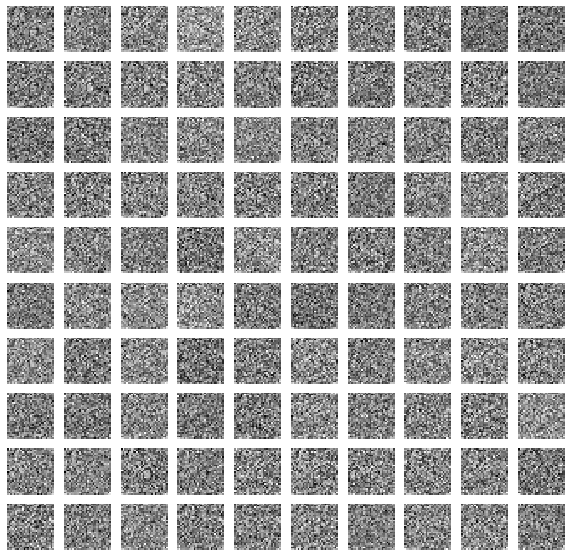

Epoch:0


  0%|                                                  | 0/468 [00:00<?, ?it/s]W0712 16:43:36.189897  7864 deprecation.py:506] From C:\Users\RAHUL\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\backend\tensorflow_backend.py:675: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
100%|████████████████████████████████████████| 468/468 [02:06<00:00,  3.75it/s]


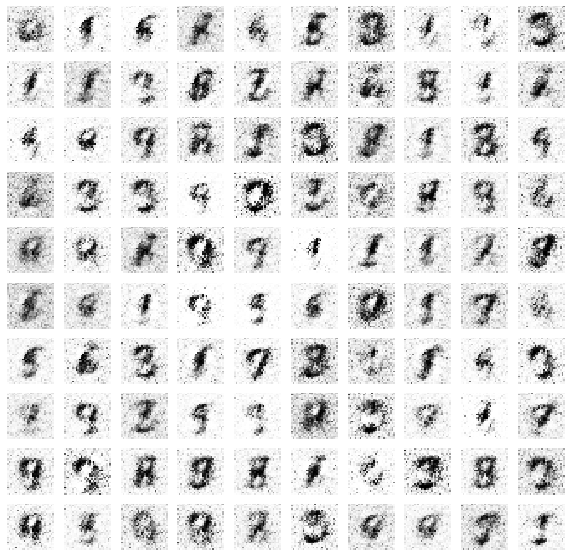

Epoch:1


100%|████████████████████████████████████████| 468/468 [01:59<00:00,  3.93it/s]


Epoch:2


100%|████████████████████████████████████████| 468/468 [02:05<00:00,  3.86it/s]


Epoch:3


100%|████████████████████████████████████████| 468/468 [02:02<00:00,  3.96it/s]


Epoch:4


100%|████████████████████████████████████████| 468/468 [01:55<00:00,  4.21it/s]


Epoch:5


100%|████████████████████████████████████████| 468/468 [02:00<00:00,  3.97it/s]


Epoch:6


100%|████████████████████████████████████████| 468/468 [02:02<00:00,  4.31it/s]


Epoch:7


100%|████████████████████████████████████████| 468/468 [01:58<00:00,  3.87it/s]


Epoch:8


100%|████████████████████████████████████████| 468/468 [02:00<00:00,  4.07it/s]


Epoch:9


100%|████████████████████████████████████████| 468/468 [01:56<00:00,  3.92it/s]


Epoch:10


100%|████████████████████████████████████████| 468/468 [01:58<00:00,  3.82it/s]


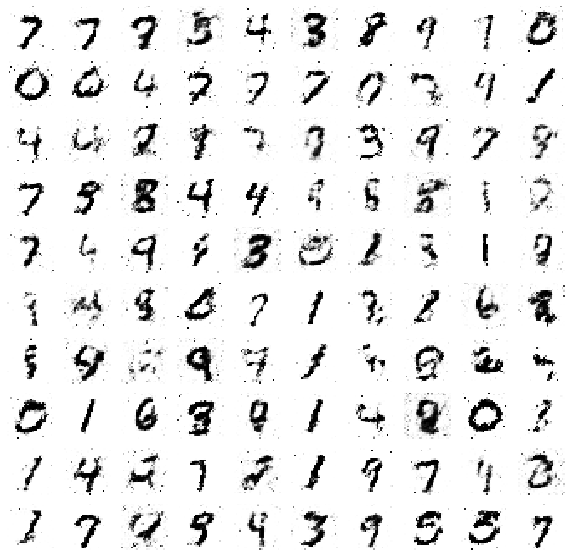

Epoch:11


100%|████████████████████████████████████████| 468/468 [02:00<00:00,  4.06it/s]


Epoch:12


100%|████████████████████████████████████████| 468/468 [01:57<00:00,  4.21it/s]


Epoch:13


100%|████████████████████████████████████████| 468/468 [01:55<00:00,  4.05it/s]


Epoch:14


100%|████████████████████████████████████████| 468/468 [01:57<00:00,  3.90it/s]


Epoch:15


100%|████████████████████████████████████████| 468/468 [01:59<00:00,  4.01it/s]


Epoch:16


100%|████████████████████████████████████████| 468/468 [01:59<00:00,  3.87it/s]


Epoch:17


100%|████████████████████████████████████████| 468/468 [01:59<00:00,  3.93it/s]


Epoch:18


100%|████████████████████████████████████████| 468/468 [02:03<00:00,  4.05it/s]


Epoch:19


100%|████████████████████████████████████████| 468/468 [01:58<00:00,  4.10it/s]


Epoch:20


100%|████████████████████████████████████████| 468/468 [01:59<00:00,  3.98it/s]


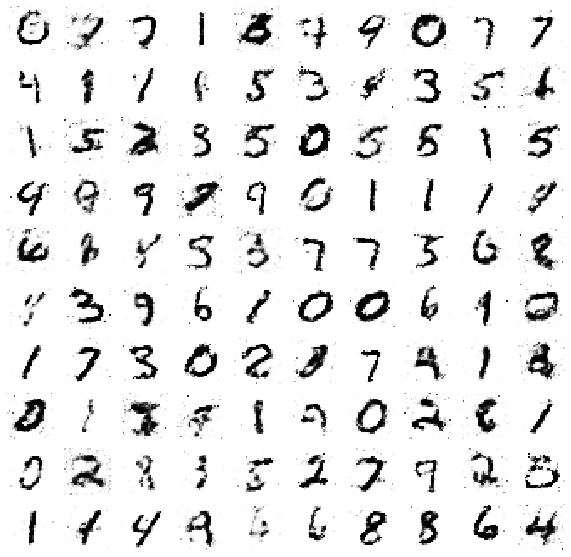

Epoch:21


100%|████████████████████████████████████████| 468/468 [02:04<00:00,  3.79it/s]


Epoch:22


100%|████████████████████████████████████████| 468/468 [02:25<00:00,  4.18it/s]


Epoch:23


100%|████████████████████████████████████████| 468/468 [01:54<00:00,  4.15it/s]


Epoch:24


100%|████████████████████████████████████████| 468/468 [01:54<00:00,  3.82it/s]


Epoch:25


100%|████████████████████████████████████████| 468/468 [01:57<00:00,  4.09it/s]


Epoch:26


100%|████████████████████████████████████████| 468/468 [01:56<00:00,  4.09it/s]


Epoch:27


100%|████████████████████████████████████████| 468/468 [01:53<00:00,  4.12it/s]


Epoch:28


 63%|█████████████████████████▏              | 295/468 [01:12<00:41,  4.12it/s]

In [0]:
train(50)